In [63]:
# Importing numpy, pandas, matplotlib.pyplot, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Importing rcParams
# Figure size and seaborn style
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 11})
sns.set_style('darkgrid')

In [65]:
# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Load the data into a pandas DataFrame
auto_df = pd.read_csv('auto-mpg.csv')

# Call head to return first 5 data
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [67]:
# Call info to check if there is any missing values
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [68]:
# Get a sense of the data by calling describe
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [69]:
# Before we go any further, we decided to drop 'car name' feature 
# Because we think it is irrelevant to our dataset
auto_df.drop(labels = ['car name'], axis = 1, inplace = True)

# Call head again to see if 'car name' column dropped
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


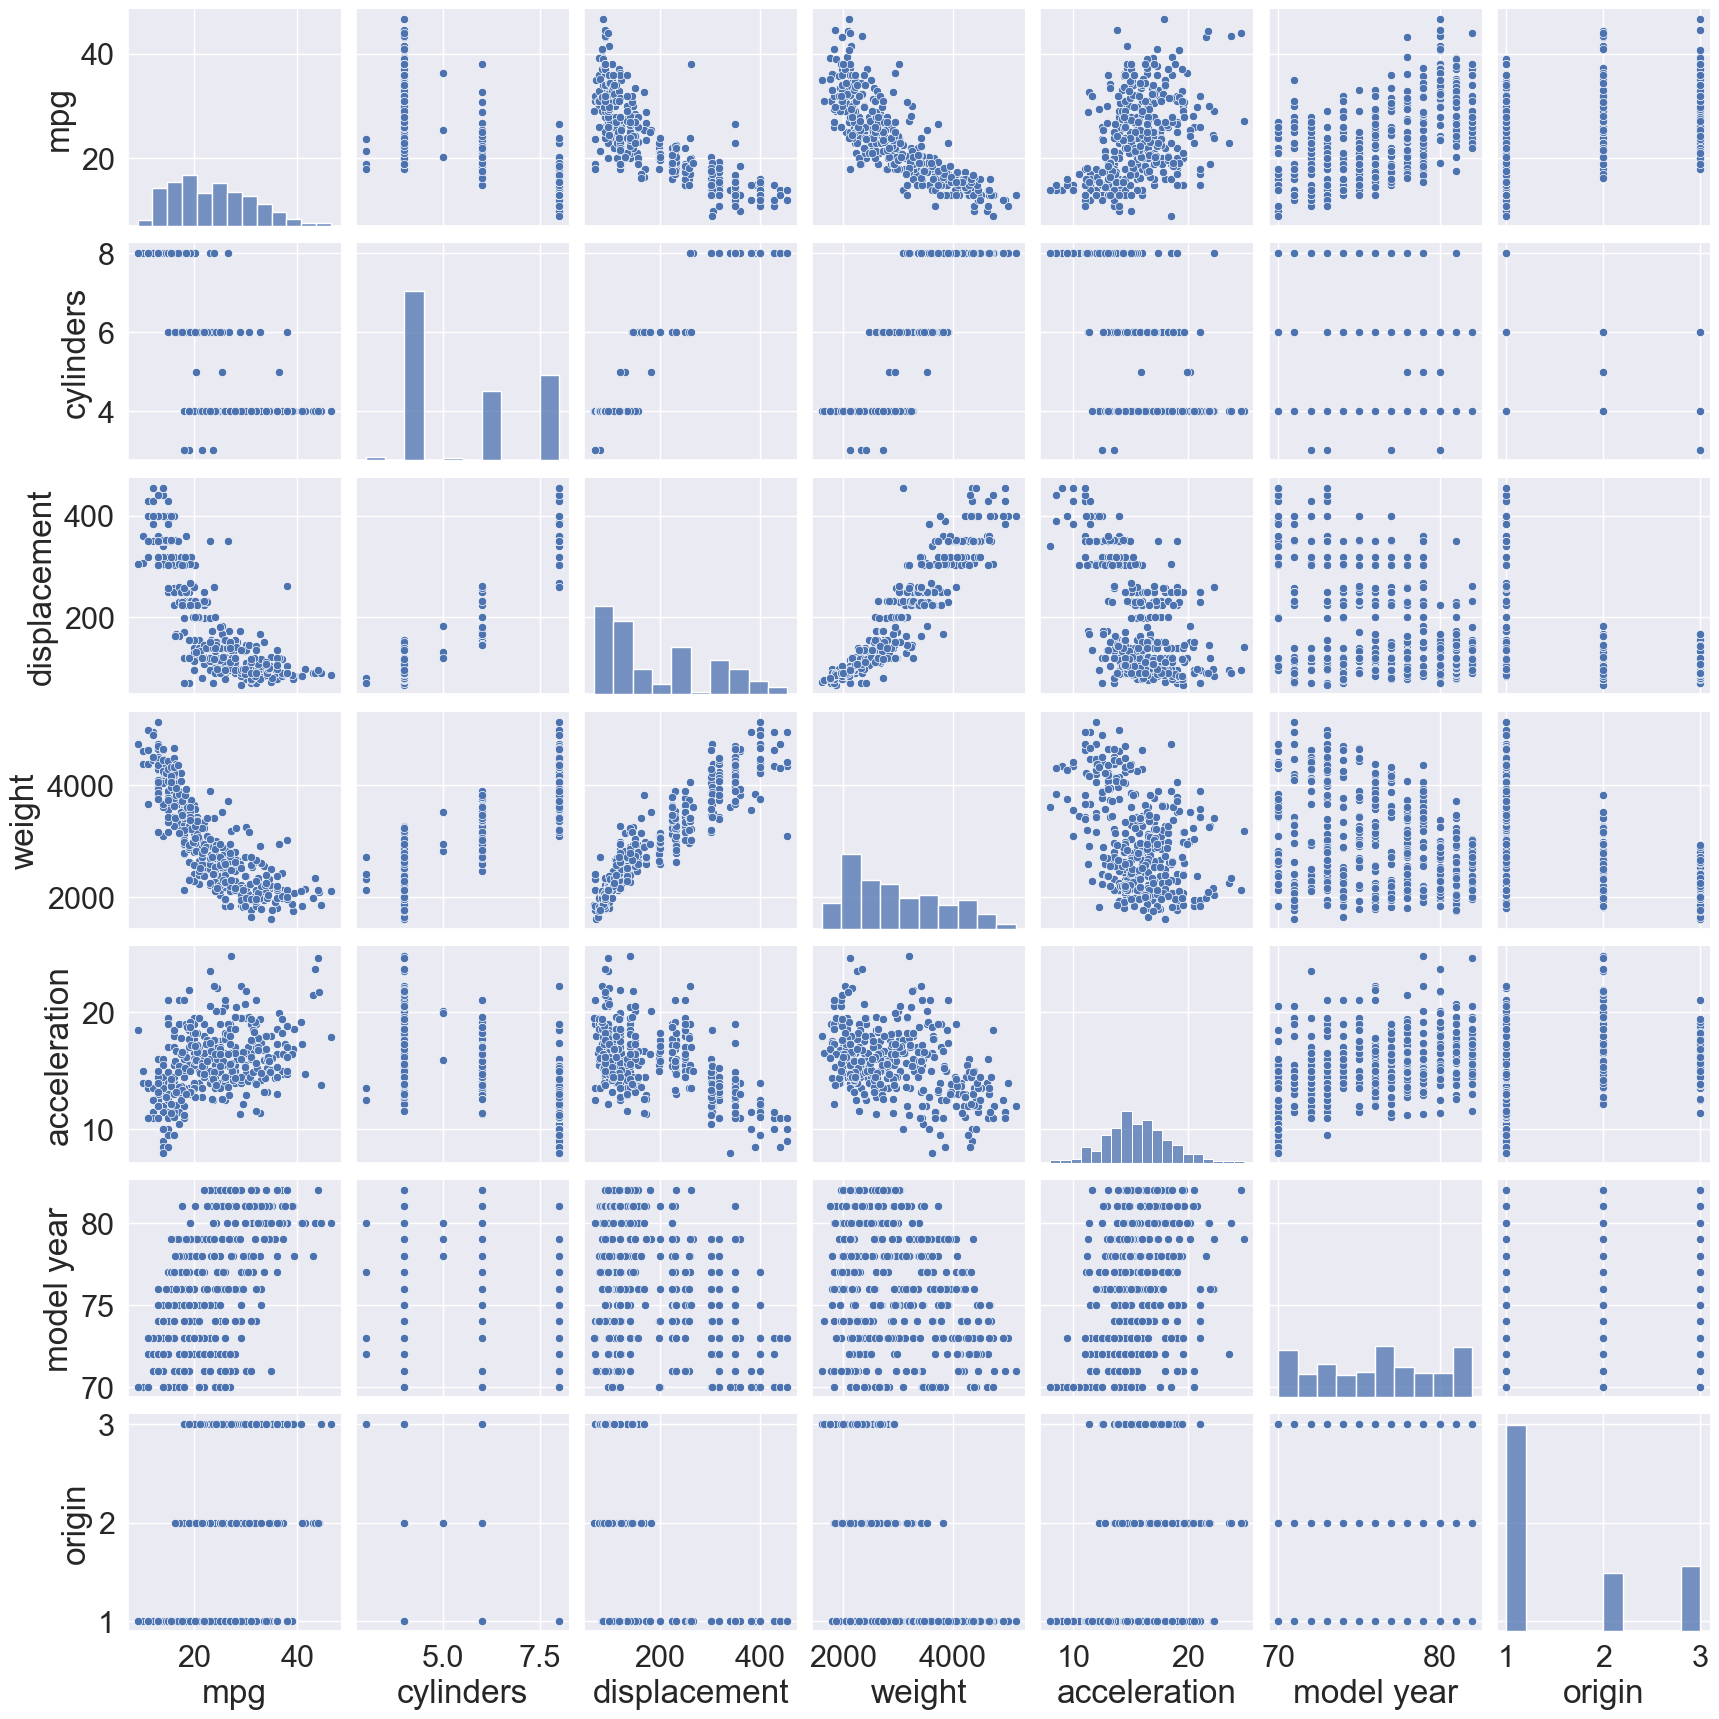

In [70]:
# Use a pairplot to have an idea of the distributions and relationships in our dataset all in one time
sns.pairplot(auto_df)
plt.show()

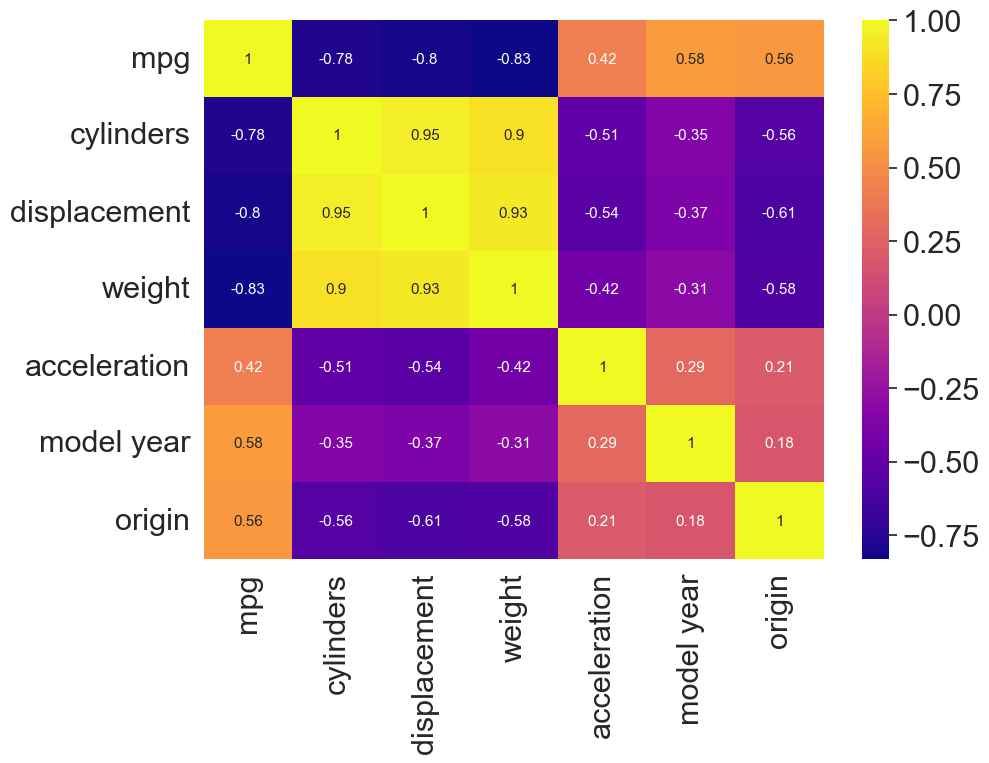

In [71]:
# I want to set up the heatmap section to see the correlation matrix 
sns.heatmap(auto_df.corr(), annot=True, cmap='plasma')
plt.show()

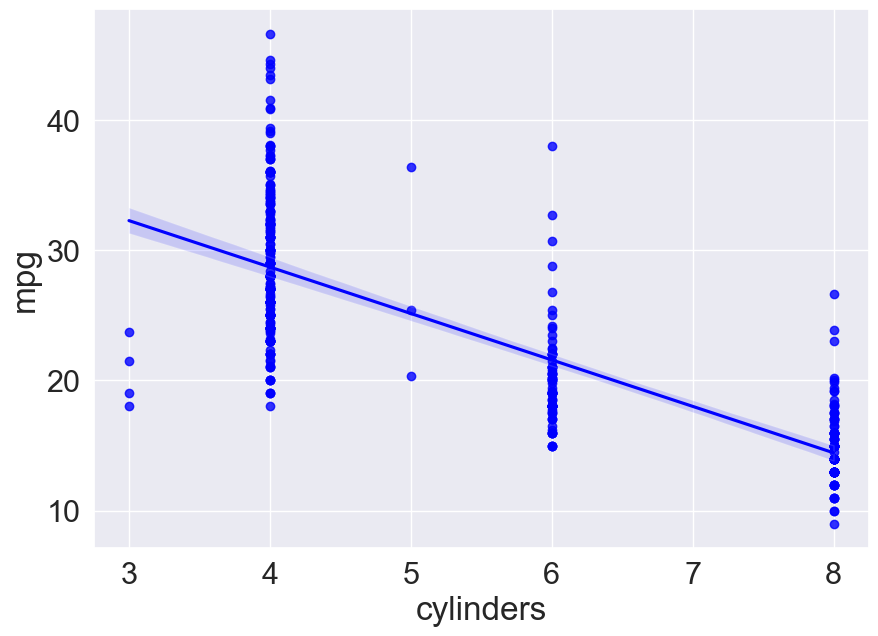

In [72]:
# According to the Correlation Matrix, we have multi-collinearity featues such as 0.95, 0.90, and 0.93.
# We decided not to drop them because we will use ridge and lasso regression which it will handle them
# Lets take a closer look some of these relationship with mpg
# Regression plot of cylinders vs. mpg
sns.regplot(data = auto_df, x = 'cylinders', y = 'mpg', color = 'blue')
plt.show()

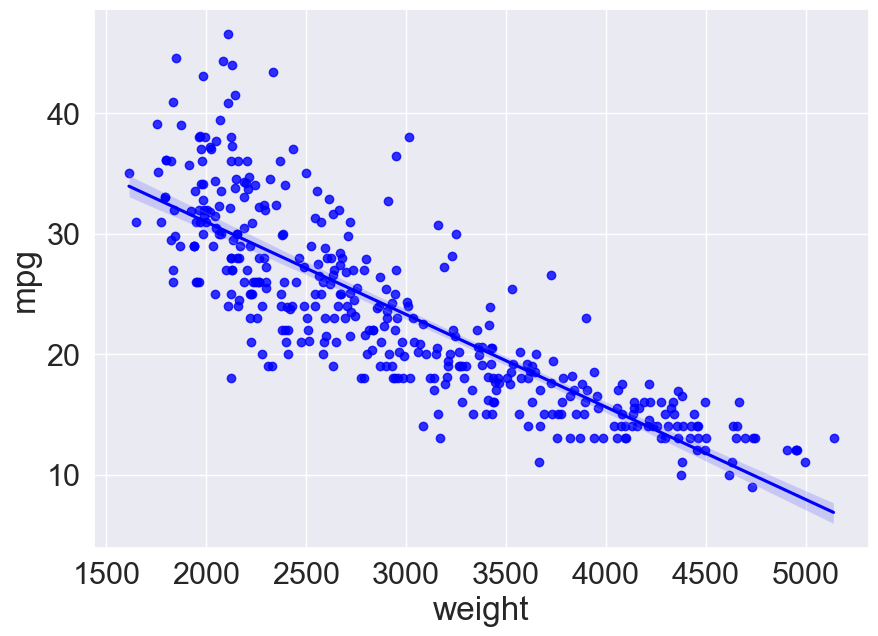

In [73]:
# Regression plot of wieght vs. mpg
sns.regplot(data = auto_df, x = 'weight', y = 'mpg', color = 'blue')
plt.show()

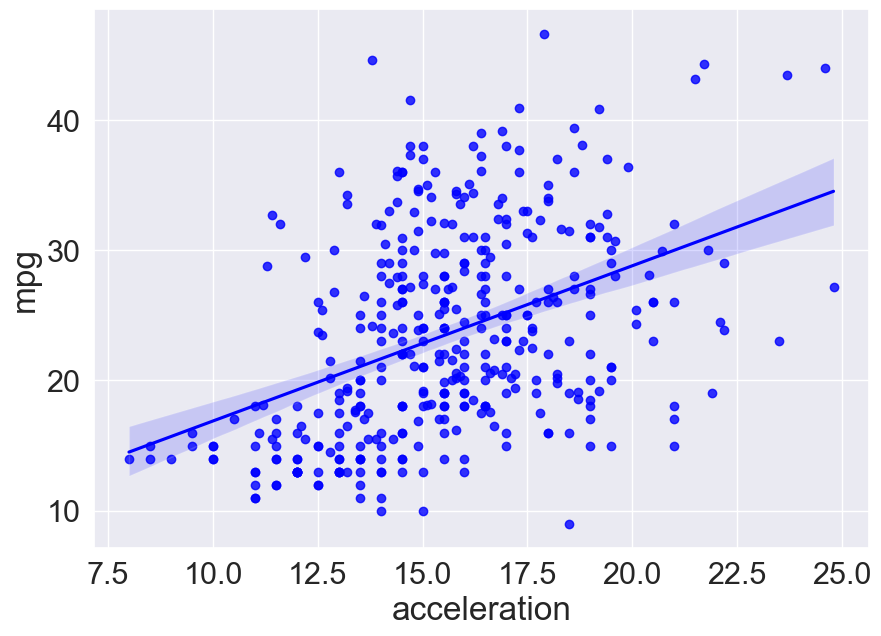

In [74]:
# Regression plot of acceleration vs. mpg
sns.regplot(data = auto_df, x = 'acceleration', y = 'mpg', color = 'blue')
plt.show()

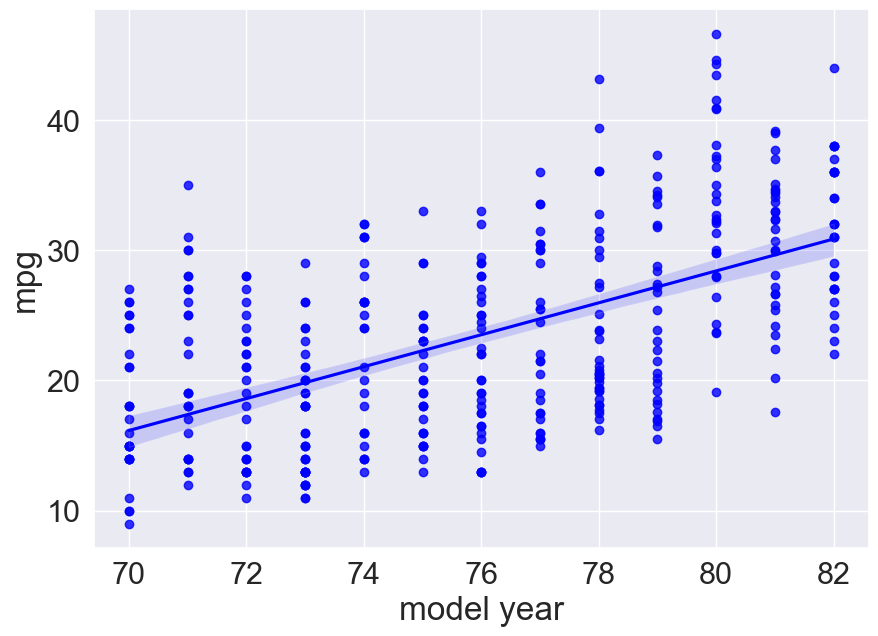

In [75]:
# Regression plot of model year vs. mpg
sns.regplot(data = auto_df, x = 'model year', y = 'mpg', color = 'blue')
plt.show()

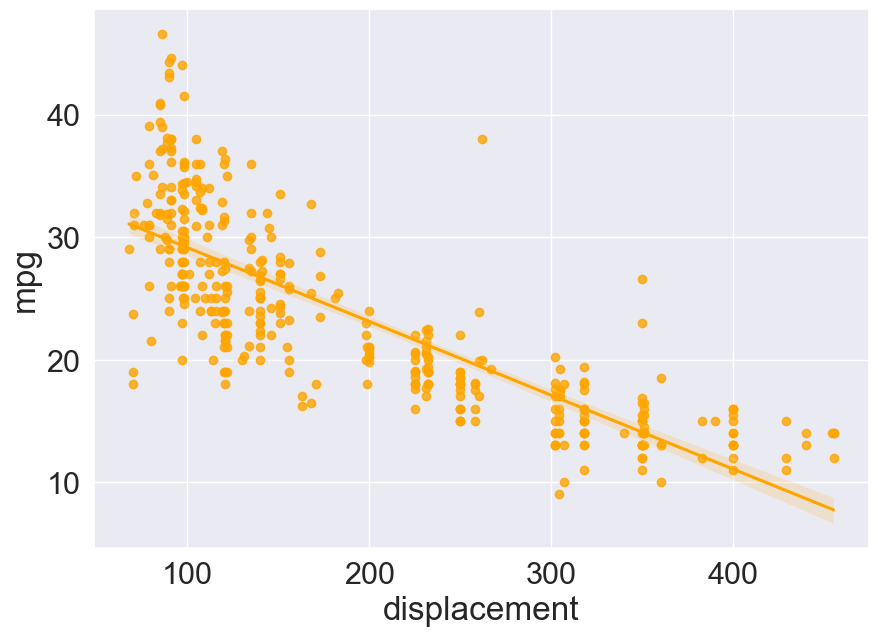

In [76]:
# Setting up the regplot to see the data between mpg and displacement
sns.regplot(x='displacement', y="mpg", data=auto_df, color ='orange')
plt.show()

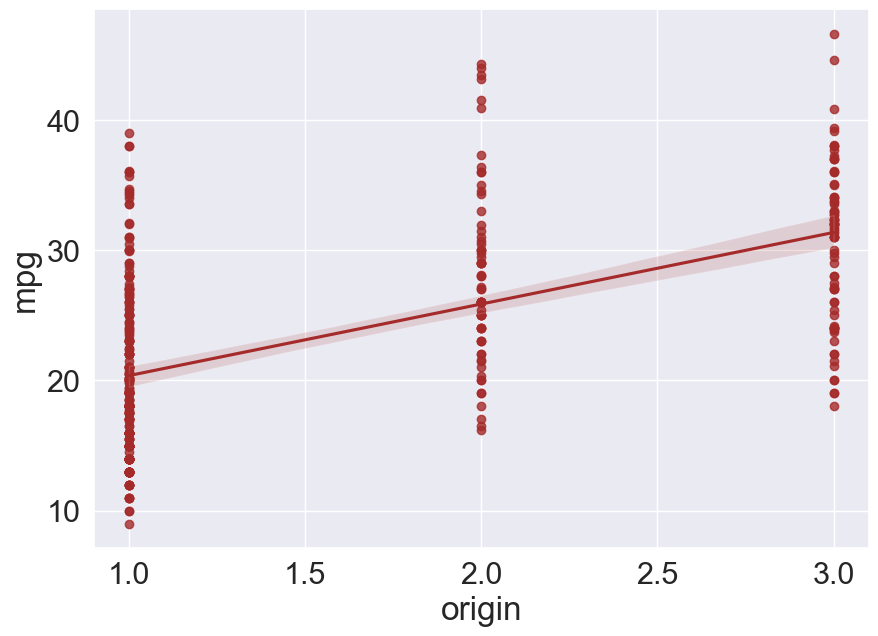

In [77]:
#Setting up the regplot to see the data between mpg and origin
sns.regplot(x='origin', y="mpg", data=auto_df, color ='brown')
plt.show()

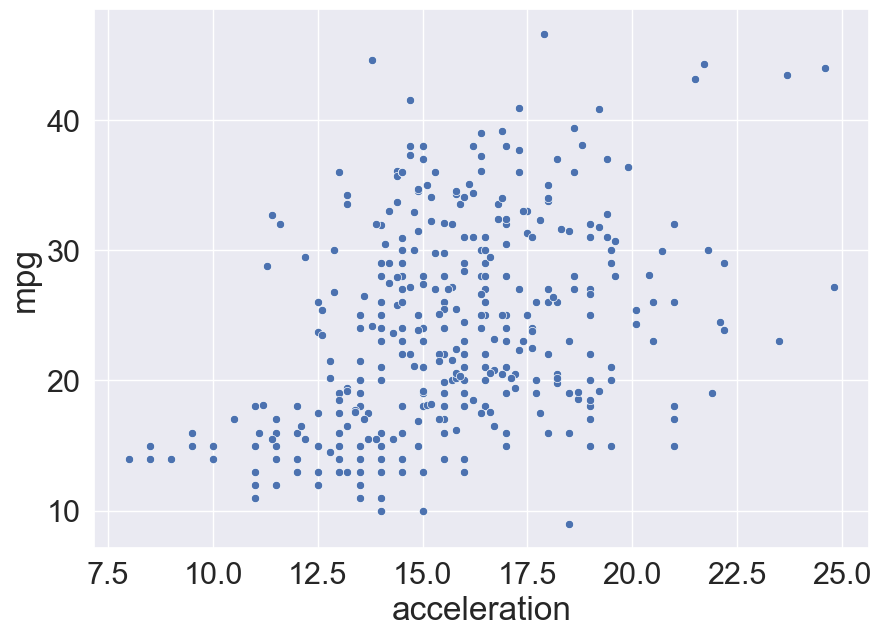

In [78]:
# creating the scatterplot
sns.scatterplot(x ='acceleration', y ='mpg', data=auto_df)
plt.show()

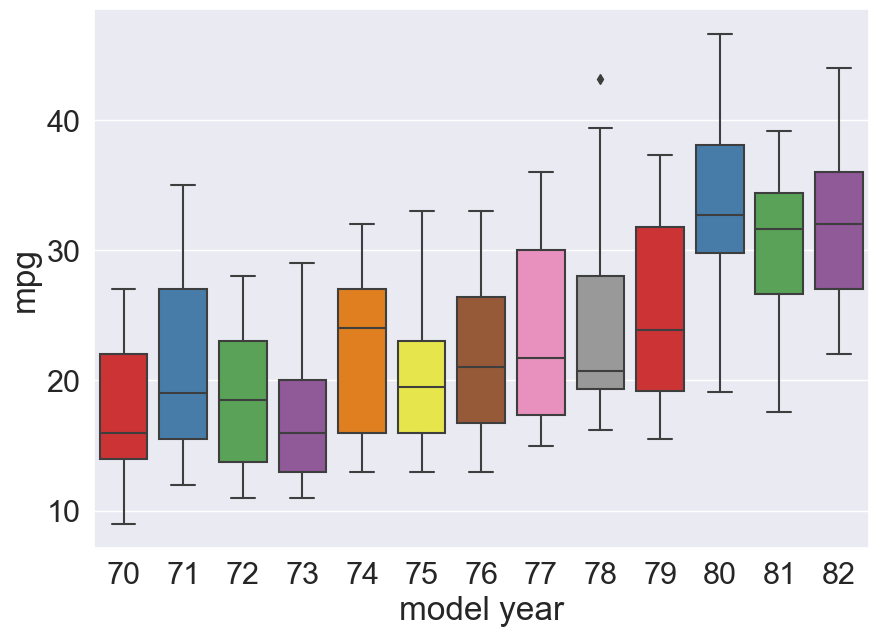

In [79]:
# Bowplot of model year vs mpg
sns.boxplot(x = 'model year', y = 'mpg', data = auto_df, palette = "Set1")
plt.show()

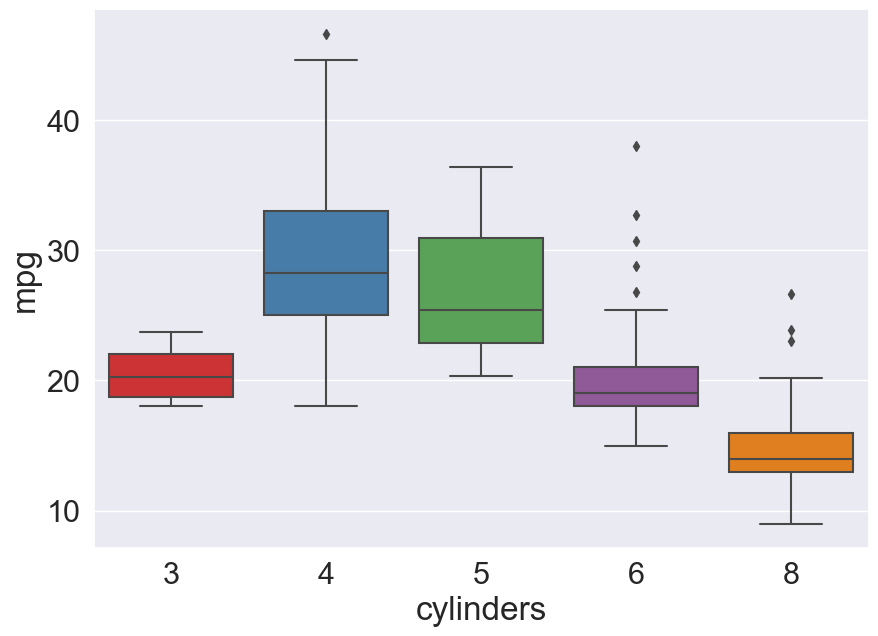

In [80]:
# Bowplot of cylinders vs mpg
sns.boxplot(x = 'cylinders', y = 'mpg', data = auto_df, palette = "Set1")
plt.show()

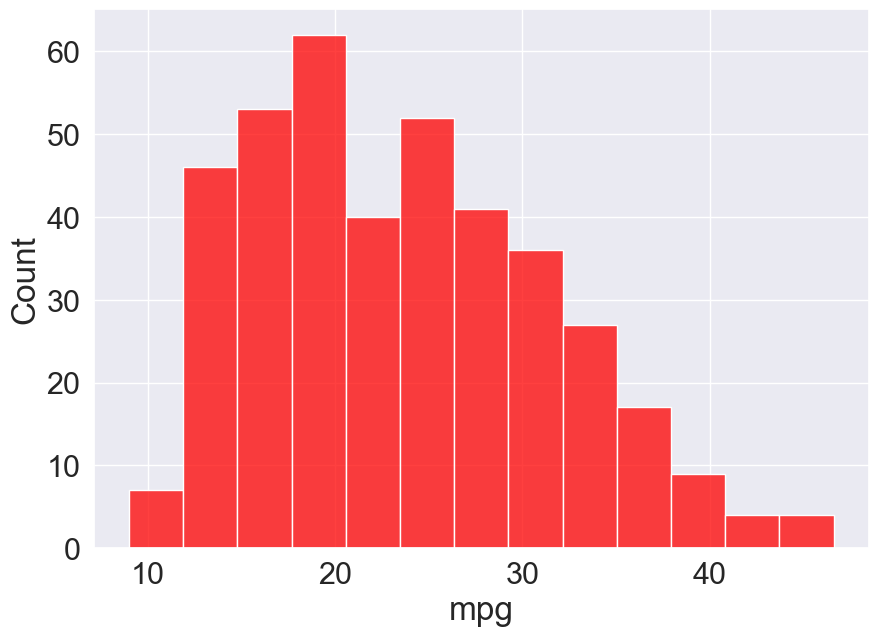

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


In [81]:
# creating the histplot mpg to see the plot and the mean of the feature 'mpg'
sns.histplot(auto_df['mpg'], color='red')
plt.show()
print(auto_df['mpg'].describe())

In [82]:
# Begin the preprocessing
# Cheak again to see any missing values
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [83]:
#It appear that there an error because of the missing value "?"
# So we have to do some research to see which feature is that has missing value
# It appear there true in horsepower section
auto_df.dtypes == 'object'

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [84]:
# Check the "?" values
auto_df.isin(['?']).sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [85]:
# It seems only 6 from 'horsepower' column that has "?" and we must fix that
# Lets replace them to 'nan' value
auto_df.replace('?', float('nan'), inplace = True)

# Drop the 'nan' values
auto_df.dropna(inplace = True)

# Check again
auto_df.isin(['?']).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [86]:
# Alright we have no missing values
# Lets scale the data using StandardScaler
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Split the data into X and y
X = auto_df.drop(['mpg'], axis = 1)
y = auto_df['mpg']

# Scale the X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new set of pandas DataFrame from X
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# Call head to return first 5 X_scaled data
X_scaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [87]:
# Importing train test split
from sklearn.model_selection import train_test_split

# We split the data into training and testing set
#  Using test size = 0.3
# Using random_state = 42 so that way my group member and I have the same state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [88]:
# We now maybe begin to modeling our dataset using Linear Regression, Ridge Regression, and Lasso Regression 

# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear = LinearRegression()

# Fit the model
linear.fit(X_train, y_train)

# Predictions
linear_pred = linear.predict(X_test)

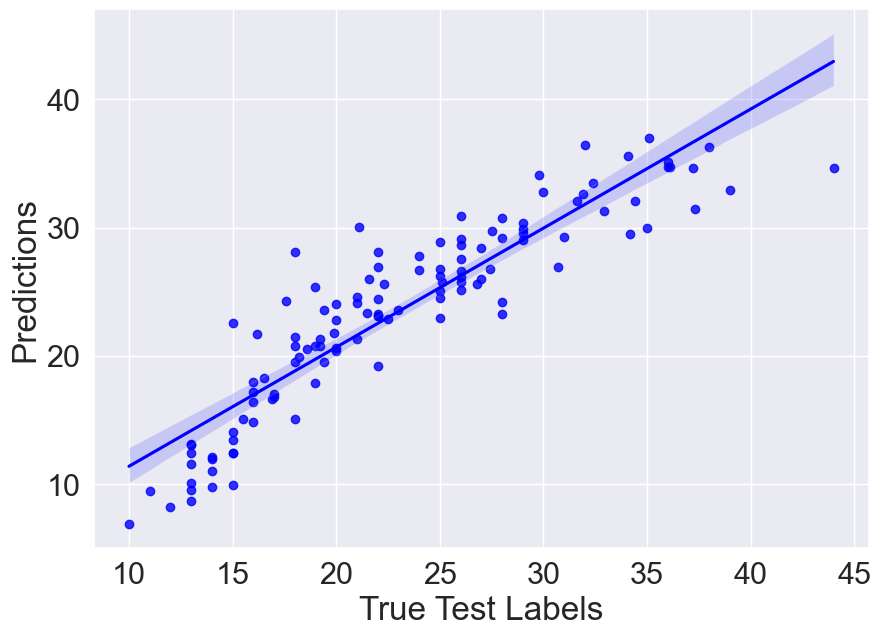

In [89]:
# Plot the regplot to see how well the model is predicting 
sns.regplot(x = y_test, y = linear_pred, color = "blue")
plt.xlabel("True Test Labels")
plt.ylabel("Predictions")
plt.show()

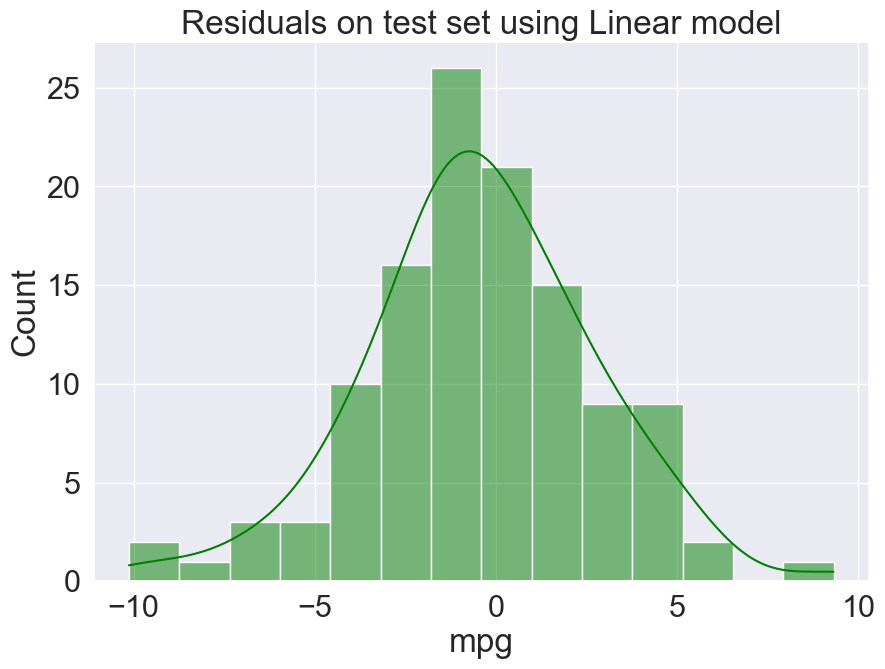

In [90]:
# Lets see the residuals be normally distributed from this model
# Calculate the residuals
residuals = y_test - linear_pred

# Plot the histogram of the residuals
sns.histplot(residuals, kde = True, color = "green")
plt.title("Residuals on test set using Linear model")
plt.show()

In [91]:
# Importing metrics
from sklearn import metrics

# Calculate the common metrics and print the output
print('MAE:', metrics.mean_absolute_error(y_test, linear_pred))
print('MSE:', metrics.mean_squared_error(y_test, linear_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_pred)))

MAE: 2.4380203503552846
MSE: 10.065877783589347
RMSE: 3.1726767537190654


In [92]:
# Get the R squared score using test set
# Importing r2_score
from sklearn.metrics import r2_score

# Calculate the R2_score and print the output
print('R-sqaured value: ', r2_score(y_test, linear_pred))

R-sqaured value:  0.809736127618413


In [93]:
# The r2_score is a good score
# Now let's interpret our linear model's coefficients
linear_coef = pd.DataFrame(linear.coef_, X_scaled.columns, columns = ['Coefficient'])
linear_coef

,Coefficient
cylinders,-0.612681
displacement,1.650579
horsepower,-1.079064
weight,-5.094809
acceleration,0.113516
model year,2.730160
origin,1.346555


In [94]:
# Lets do Ridge Regression
# Importing Ridge Regression model
from sklearn.linear_model import Ridge

# Create a Linear Regression model using alpha = 0.05
ridge = Ridge(alpha = 0.05, normalize = True)

# Fit the model
ridge.fit(X_train, y_train)

# Predictions
ridge_pred = ridge.predict(X_test)

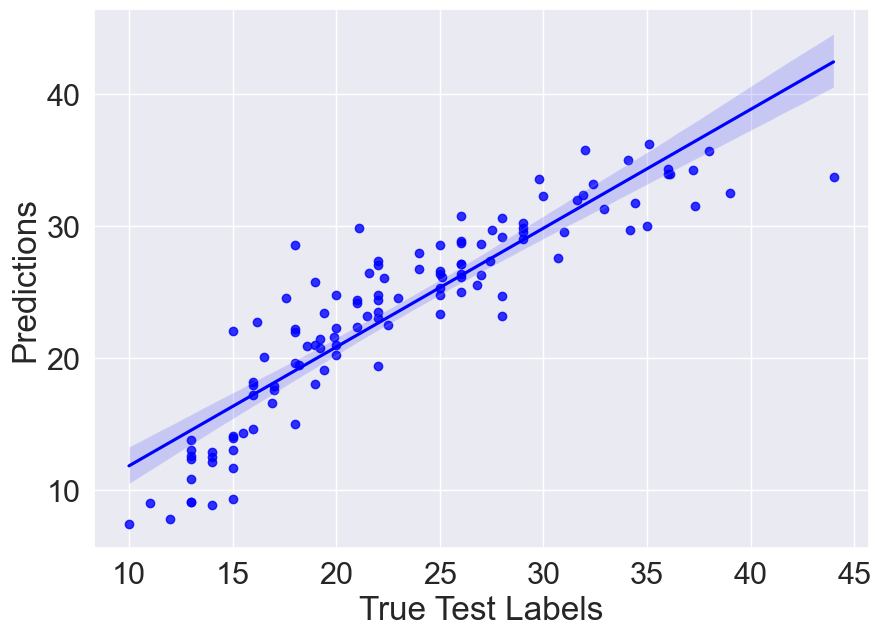

In [95]:
# Plot the regplot to see how well the model is predicting 
sns.regplot(x = y_test, y = ridge_pred, color = "blue")
plt.xlabel("True Test Labels")
plt.ylabel("Predictions")
plt.show()

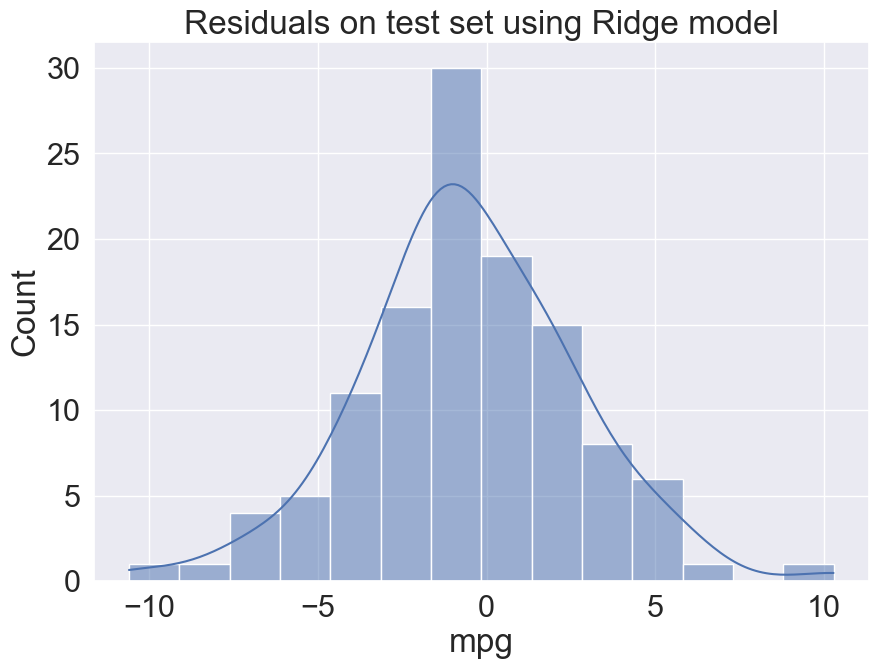

In [96]:
# Lets see the residuals be normally distributed from this model
# Calculate the residuals
residuals = y_test - ridge_pred

# Plot the histogram of the residuals
sns.histplot(residuals, kde = True)
plt.title("Residuals on test set using Ridge model")
plt.show()

In [97]:
# Calculate the common metrics and print the output
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

# Calculate the R2_score and print the output
print('R-sqaured value: ', r2_score(y_test, ridge_pred))

MAE: 2.5181775980687213
MSE: 10.647151632513632
RMSE: 3.2629973387230384
R-sqaured value:  0.7987489672546353


In [98]:
# The r2_score is a good score
# Now let's interpret our linear model's coefficients
ridge_coef = pd.DataFrame(ridge.coef_, X_scaled.columns, columns = ['Coefficient'])
ridge_coef

,Coefficient
cylinders,-0.444963
displacement,-0.050371
horsepower,-1.272579
weight,-3.551764
acceleration,-0.109708
model year,2.502778
origin,1.232362


In [99]:
# Lets do Lasso Regression
# Importing Lasso Regression model
from sklearn.linear_model import Lasso

# Create a Lasso Regression model using alpha = 0.05
lasso = Lasso(alpha = 0.05, normalize = True)

# Fit the model
lasso.fit(X_train, y_train)

# Predictions
lasso_pred = lasso.predict(X_test)

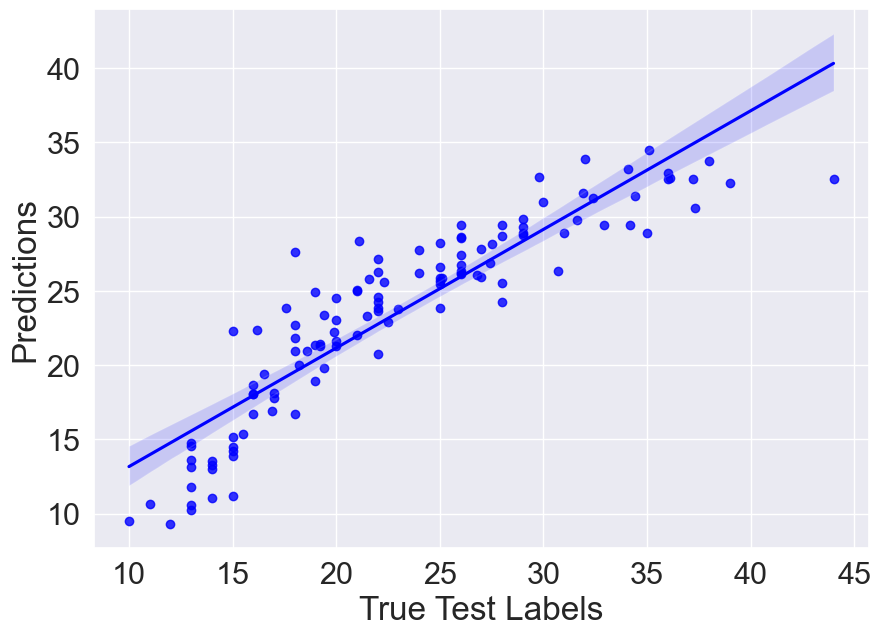

In [100]:
# Plot the regplot to see how well the model is predicting 
sns.regplot(x = y_test, y = lasso_pred, color = "blue")
plt.xlabel("True Test Labels")
plt.ylabel("Predictions")
plt.show()

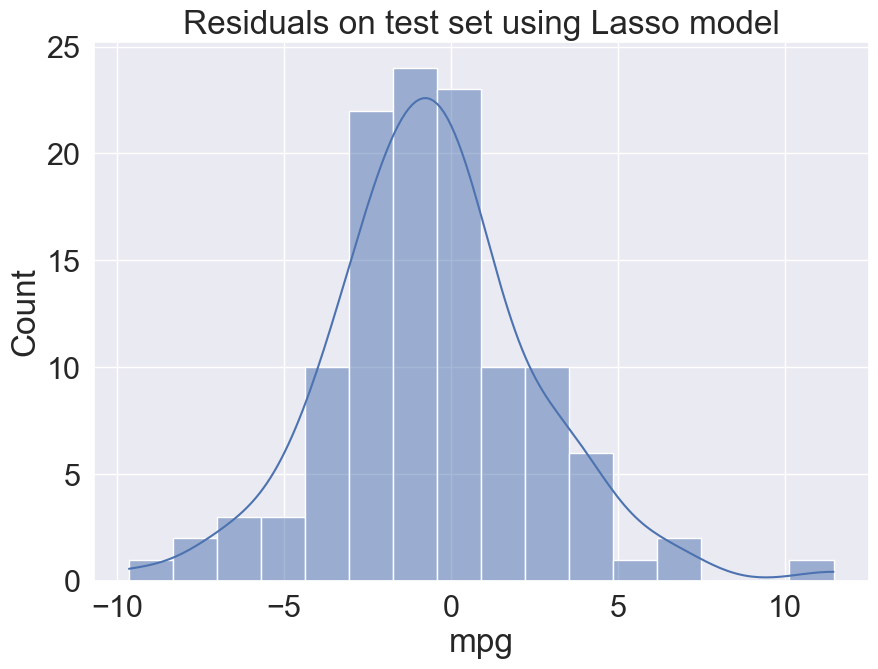

In [101]:
# Lets see the residuals be normally distributed from this model
# Calculate the residuals
residuals = y_test - lasso_pred

# Plot the histogram of the residuals
sns.histplot(residuals, kde = True)
plt.title("Residuals on test set using Lasso model")
plt.show()

In [102]:
# Calculate the common metrics and print the output
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

# Calculate the R2_score and print the output
print('R-sqaured value: ', r2_score(y_test, lasso_pred))

MAE: 2.3542724882312016
MSE: 9.798179101444429
RMSE: 3.130204322635254
R-sqaured value:  0.8147961322192415


In [103]:
# The r2_score is a good score
# Now let's interpret our linear model's coefficients
lasso_coef = pd.DataFrame(lasso.coef_, X_scaled.columns, columns = ['Coefficient'])
lasso_coef

,Coefficient
cylinders,-0.000000
displacement,-0.000000
horsepower,-0.686746
weight,-4.307863
acceleration,0.000000
model year,2.058719
origin,0.622892
